In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [2]:
df=pd.read_csv("bodyPerformance.csv")
display(df)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:

def description (data: pd.DataFrame):
    print(f"Shape: \n{data.shape}\n")
    print(f"Dimension: \n{data.ndim}\n")
    print(f"Data types: \n{data.dtypes}\n")
    print(f"Data information: \n{data.info()}\n")
    print(f"Data description: \n{data.describe()}\n")
    print(f"Total de valores nulos: \n{data.isnull().sum()}\n")
    print(f"Total de valores duplicados: \n{data.duplicated().sum()}\n")

description(df)

Shape: 
(13393, 12)

Dimension: 
2

Data types: 
age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic               

Data Preparation

In [4]:
#Copia del dataset:
df2 = df.copy()

In [5]:
#Eliminar valor duplicado:

#Creo una variable que me indique si hay valores duplicados:
duplicados = df2.duplicated()
#Muestro los valores duplicados:
fila_duplicada = df2[duplicados]
print("Fila duplicada:")
print(fila_duplicada)
#Elimino los valores duplicados:
df2.drop_duplicates(inplace=True)
#Verifico que se hayan eliminado los valores duplicados:
print(f"Total de valores duplicados: \n{df2.duplicated().sum()}\n")

Fila duplicada:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
12473  27.0      F      157.0       49.1        30.7       70.0      86.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
12473       27.7                     19.7            51.0          167.0     A  
Total de valores duplicados: 
0



In [6]:
# Conversión cm a m.
#Conversion y renombrado de la altura (height_cm):
df2["alto_m"] = df2["height_cm"]/100
#Conversion y renombrado de columna Sentarse e inclinarse hacia adelante (sit and bend forward_cm):
df2["sentarse_inclinarse_m"] = df2["sit and bend forward_cm"]/100
#Conversion y renombrado de columna salto en largo (broad jump_cm):
df2["salto_largo_m_"] = df2["broad jump_cm"]/100

#Eliminar columnas en cm.
df2.drop(["height_cm","sit and bend forward_cm","broad jump_cm"], axis=1, inplace=True)

# Calcula el IMC:
df2['IMC'] = df2['weight_kg'] / (df2['alto_m'] ** 2)

#Renombrar las columnas:
df2.rename(columns={"age": "edad", "gender": "genero","height_cm":"alto_m", "weight_kg": "peso_kg","body fat_%": "grasa_corporal_%","diastolic": "diastolica","systolic": "sistolica","gripForce": "fuerza_agarre",
"sit-ups counts": "cant_abdominales","class": "clase"}, inplace=True)

df.head(10)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


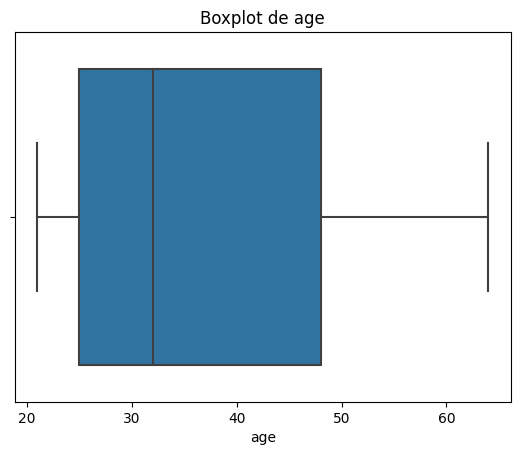

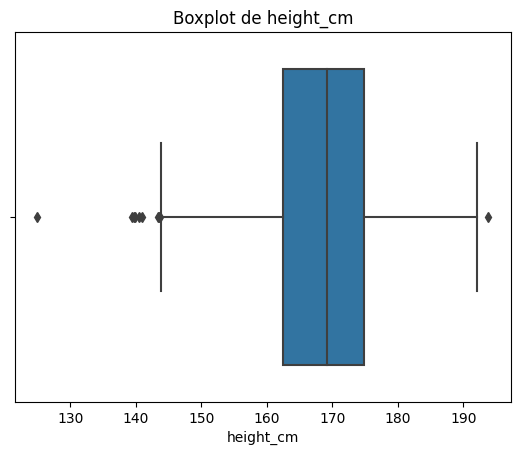

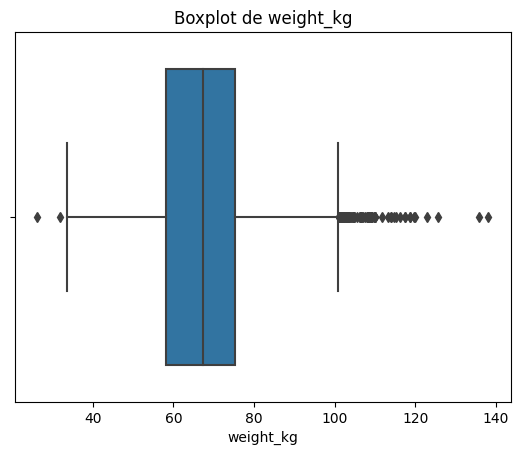

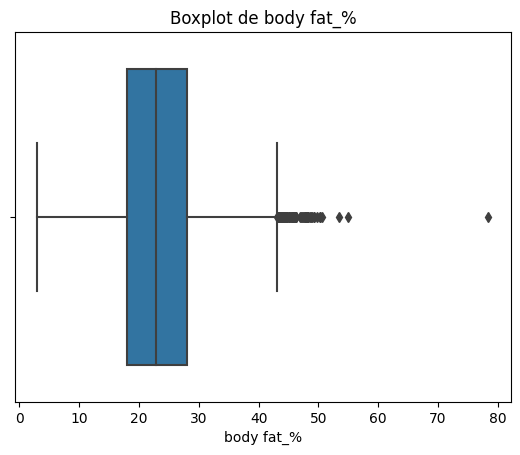

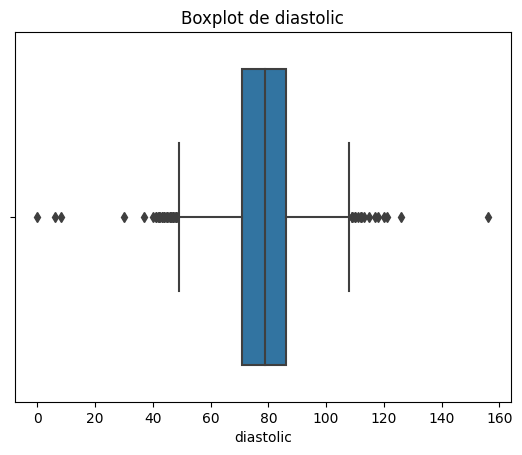

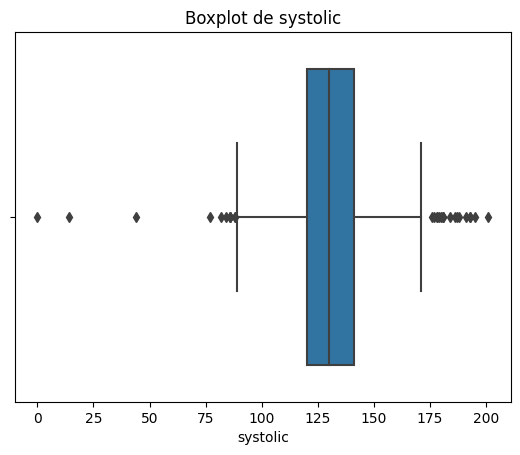

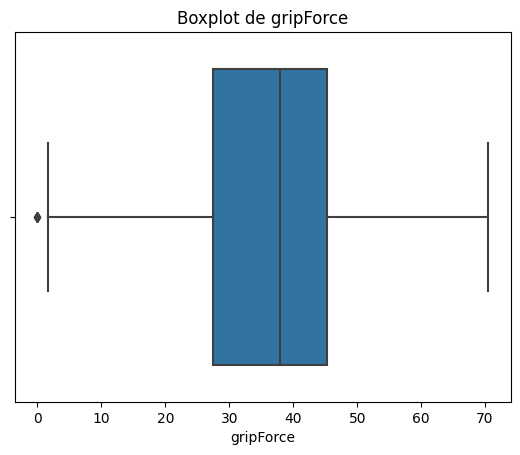

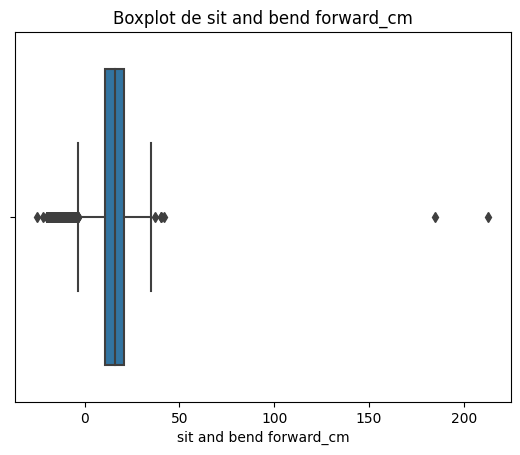

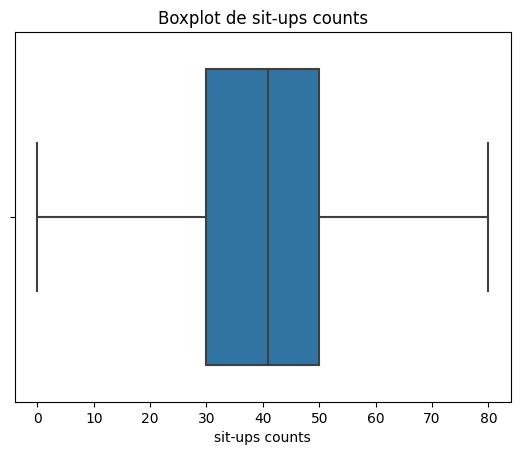

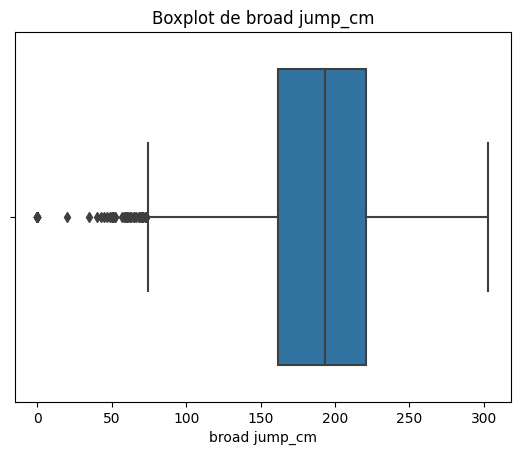

Registros con outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
47     26.0      M      172.1      66.10    24.90000       62.0     102.0   
58     42.0      M      174.1     103.10    30.50000       78.0     123.0   
75     22.0      M      171.9      78.46    22.90000       64.0     116.0   
136    61.0      F      153.2      62.20    37.00000       71.0     111.0   
139    22.0      M      180.3      91.70    32.10000       75.0     134.0   
...     ...    ...        ...        ...         ...        ...       ...   
13280  26.0      M      173.5      68.70    15.16476       78.0     120.0   
13301  26.0      M      175.4      74.70    18.20000       93.0     150.0   
13318  25.0      M      187.9      94.90    19.40000       68.0     107.0   
13357  56.0      M      173.0      52.60    12.90000       92.0     141.0   
13380  42.0      M      172.0      76.30    32.80000      100.0     147.0   

       gripForce  sit and bend forward_cm  sit-ups 

In [7]:
# Identificación de outliers:

numericas = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for column in numericas:
    sns.boxplot(x=df[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((df[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = df[outliers]
print("Registros con outliers:")
print(outlier_rows)

In [8]:
# Eliminar las filas que contienen outliers
df = df[~outliers]

# Mostrar el DataFrame limpio
print("DataFrame sin outliers:")
print(df)

DataFrame sin outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups 

In [9]:
#Binarizado de la columna genero: Utilizamos get_dummies para crear una columna por cada valor de la columna genero. (La columna genero se elimina y se crea genero_M donde M:1 / F:0)

df2 = pd.get_dummies(df2, columns=['genero'], drop_first=True)
# renombramos la columna genero_M a genero:
df2.rename(columns={"genero_M":'genero'},inplace=True)
conteo_genero = df2['genero'].value_counts()

# Mostrar los conteos de las columnas genero y clase:
print('Cantidad de 0 y 1 en la columna género:')
print(conteo_genero)

Cantidad de 0 y 1 en la columna género:
1    8467
0    4925
Name: genero, dtype: int64


In [10]:
# Asignamos valores numéricos a las clases: Usamos la función labelEncoder para mapear los valores categóricos de "clase" a valores numericos.

# Mapeo de valores de la columna clase:
# A:0,
# B:1,
# C:2,
# D:3

encode =LabelEncoder()
df2["clase_encode"] = encode.fit_transform(df2["clase"])
# Eliminamos la columna clase:
df2.drop(["clase"], axis=1, inplace=True)
# renombramos la columna clase_encode a clase:
df2.rename(columns={"clase_encode":'clase'},inplace=True)
conteo_clase = df2['clase'].value_counts()
print('Cantidad de 0,1,2,3 en la columna clase:')
print(conteo_clase)

Cantidad de 0,1,2,3 en la columna clase:
2    3349
3    3349
0    3347
1    3347
Name: clase, dtype: int64


In [11]:
#Reordenamos:
ordenado =[
'edad',
'genero',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
'clase',
]
df2 = df2[ordenado]

# Mostrar dataset:
df2.head(10)

,edad,genero,alto_m,peso_kg,grasa_corporal_%,IMC,diastolica,sistolica,fuerza_agarre,sentarse_inclinarse_m,cant_abdominales,salto_largo_m_,clase
0,27.0,1,1.723,75.24,21.3,25.344179,80.0,130.0,54.9,0.184,60.0,2.17,2
1,25.0,1,1.650,55.80,15.7,20.495868,77.0,126.0,36.4,0.163,53.0,2.29,0
2,31.0,1,1.796,78.00,20.1,24.181428,92.0,152.0,44.8,0.120,49.0,1.81,2
3,32.0,1,1.745,71.10,18.4,23.349562,76.0,147.0,41.4,0.152,53.0,2.19,1
4,28.0,1,1.738,67.70,17.1,22.412439,70.0,127.0,43.5,0.271,45.0,2.17,1
5,36.0,0,1.654,55.40,22.0,20.250640,64.0,119.0,23.8,0.210,27.0,1.53,1
6,42.0,0,1.645,63.70,32.2,23.540063,72.0,135.0,22.7,0.008,18.0,1.46,3
7,33.0,1,1.749,77.20,36.9,25.236997,84.0,137.0,45.9,0.123,42.0,2.34,1
8,54.0,1,1.668,67.50,27.6,24.261167,85.0,165.0,40.4,0.186,34.0,1.48,2
9,28.0,1,1.850,84.60,14.4,24.718773,81.0,156.0,57.9,0.121,55.0,2.13,1


In [12]:
# Selecciono las columnas con valores numéricos continuos:
columnas_a_escalar = [
'edad',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
]

# Creo un nuevo dataframe con las columnas a escalar:
df_columnas_escalar = df2[columnas_a_escalar]

# Instancio el objeto StandardScaler:
scaler = StandardScaler()

# Escalo las columnas seleccionadas
df_scaled_values = scaler.fit_transform(df_columnas_escalar)

# Crear un nuevo DataFrame escalado
df_scaled = pd.DataFrame(df_scaled_values, columns=columnas_a_escalar)

In [13]:
# Verifico nulos en 'genero' y 'clase' en df2
print('Nulos en genero en df2:', df2['genero'].isnull().sum())
print('Nulos en clase en df2:', df2['clase'].isnull().sum())

# Agregar 'genero' y 'clase' a df_scaled
df_scaled['genero'] = df2['genero']
df_scaled['clase'] = df2['clase']

Nulos en genero en df2: 0
Nulos en clase en df2: 0


In [14]:
#Encontramos nulos al revisar luego de hacer el Standard Scale.
# Verificar y eliminar filas con nulos en 'genero' y 'clase'
df_scaled.dropna(subset=['genero', 'clase'], inplace=True)



In [15]:
#Reordenamos:
ordenado =[
'edad',
'genero',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
'clase',
]
df_scaled = df_scaled[ordenado]

#Mostrar dataset escalado:
df_scaled.head(10)

,edad,genero,alto_m,peso_kg,grasa_corporal_%,IMC,diastolica,sistolica,fuerza_agarre,sentarse_inclinarse_m,cant_abdominales,salto_largo_m_,clase
0,-0.717473,1.0,0.443785,0.652068,-0.267290,0.590966,0.111946,-0.016189,1.688110,0.377347,1.417000,0.673949,2.0
1,-0.864258,1.0,-0.422582,-0.974898,-1.039006,-1.057692,-0.167337,-0.288131,-0.053138,0.129020,0.926679,0.974946,0.0
2,-0.423903,1.0,1.310152,0.883058,-0.432658,0.195574,1.229081,1.479495,0.737483,-0.379460,0.646496,-0.229043,2.0
3,-0.350510,1.0,0.704882,0.305585,-0.666929,-0.087300,-0.260432,1.139567,0.417470,-0.001056,0.926679,0.724115,1.0
4,-0.644080,1.0,0.621806,0.021033,-0.846077,-0.405966,-0.818999,-0.220146,0.615125,1.406131,0.366313,0.673949,1.0
5,-0.056941,0.0,-0.375110,-1.008375,-0.170826,-1.141081,-1.377567,-0.764031,-1.239069,0.684799,-0.894512,-0.931369,1.0
6,0.383414,0.0,-0.481922,-0.313734,1.234799,-0.022520,-0.632810,0.323740,-1.342603,-1.703871,-1.524925,-1.106951,3.0
7,-0.277118,1.0,0.752354,0.816104,1.882489,0.554519,0.484325,0.459711,0.841016,-0.343984,0.156175,1.100361,1.0
8,1.264124,1.0,-0.208957,0.004295,0.600890,0.222690,0.577419,2.363309,0.323348,0.400997,-0.404191,-1.056784,2.0
9,-0.644080,1.0,1.951026,1.435423,-1.218154,0.378297,0.205041,1.751438,1.970475,-0.367634,1.066771,0.573616,1.0


Modelado

In [16]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
X = np.array(df_scaled.drop(['clase'],1))
y = np.array(df_scaled['clase'])
X.shape

C:\Users\usuario\AppData\Local\Temp\ipykernel_13408\4192170357.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_scaled.drop(['clase'],1))


(13391, 12)

In [18]:
model = linear_model.LogisticRegression()
model.fit(X,y)

C:\Users\usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Prediccion

In [20]:
predictions = model.predict(X)
print(predictions)

[0. 1. 2. ... 0. 3. 1.]


In [21]:
model.score(X,y)

0.5964453737584945

Validacion modelo

In [22]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [23]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

C:\Users\usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\usuario\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Logistic Regression: 0.591114 (0.010805)


In [24]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6110488988428519


Evaluacion

Una vez que creado el modelo. Es muy importante evaluar la precisión del modelo para comprender si es importante implementarlo o no. La curva ROC es uno de los métodos de evaluación importantes. La curva ROC es una curva de probabilidad que traza la tasa de verdaderos positivos frente a la tasa de falsos positivos. Aquí, la tasa de verdaderos positivos es la cantidad de predicciones en las que el modelo logró predecir el resultado correctamente.

Si el TPR está más cerca de 1, eso demuestra que es un muy buen modelo. El modelo es capaz de distinguir correctamente entre resultados positivos y negativos.
Si el TPR es 0,5, muestra que el modelo es tan bueno como una suposición.
Si el TPR está por debajo de 0,5, muestra que el modelo predice valores positivos como negativos y valores negativos como positivos.

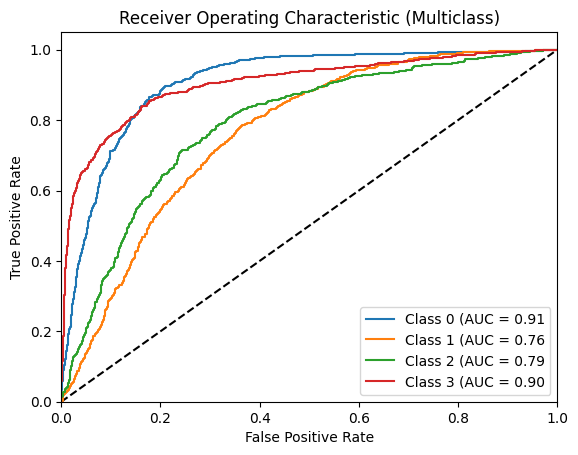

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Supongamos que 'model' es un modelo de clasificación multiclase y X_validation contiene datos de validación
y_pred_prob = model.predict_proba(X_validation)

# Calcula el valor AUC-ROC para cada clase y genera la curva ROC para cada una
n_classes = len(model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_validation == i, y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(Y_validation == i, y_pred_prob[:, i])

# Plotea las curvas ROC para cada clase
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multiclass)')
plt.legend(loc="lower right")
plt.show()





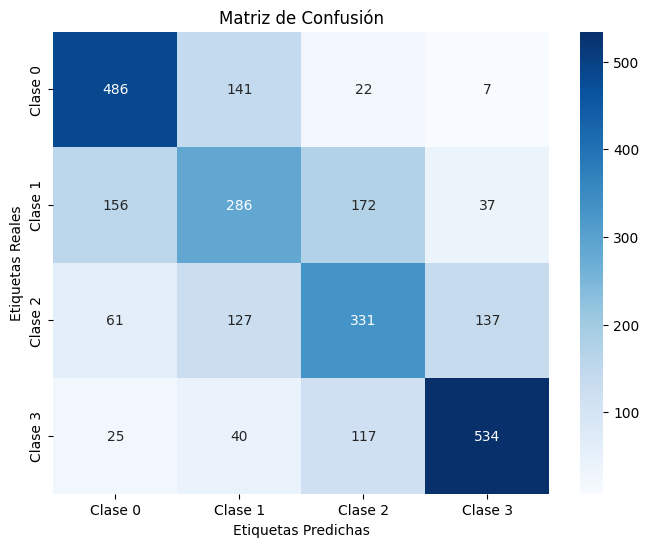

In [42]:
#Y_pred contiene las etiquetas predichas por tu modelo y Y_validation contiene las etiquetas reales
Y_pred = model.predict(X_validation) 

# Calcula la matriz de confusión
confusion = confusion_matrix(Y_validation, Y_pred)

# Define las etiquetas de las clases 
class_labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3']  

# Crea un gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matriz de Confusión")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Reales")
plt.show()


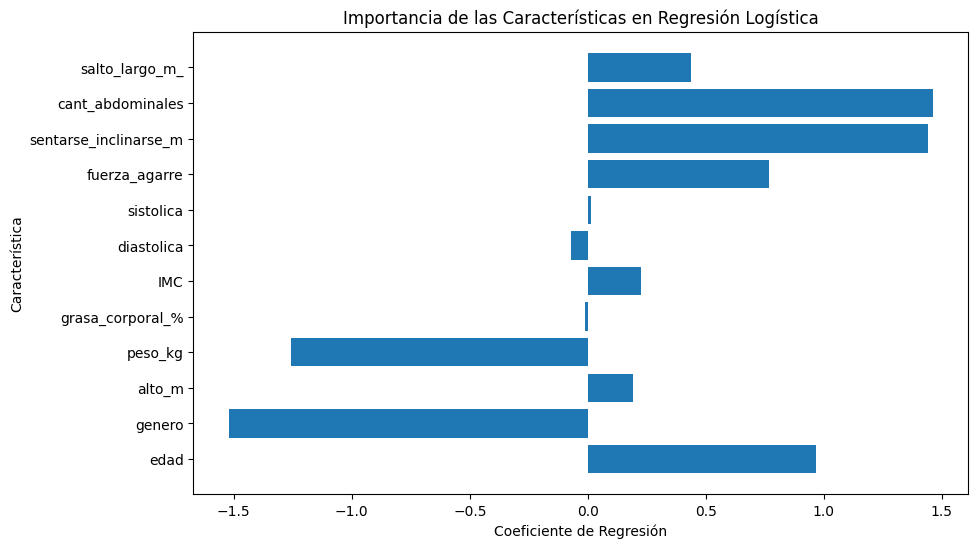

In [48]:
# Obtiene los coeficientes de regresión del modelo
coefficients = model.coef_[0]
# Obtén los nombres de las características (columnas)
feature_names = df_scaled.columns.drop('clase')
# Crea un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), feature_names)
plt.xlabel('Coeficiente de Regresión')
plt.ylabel('Característica')
plt.title('Importancia de las Características en Regresión Logística')
plt.show()

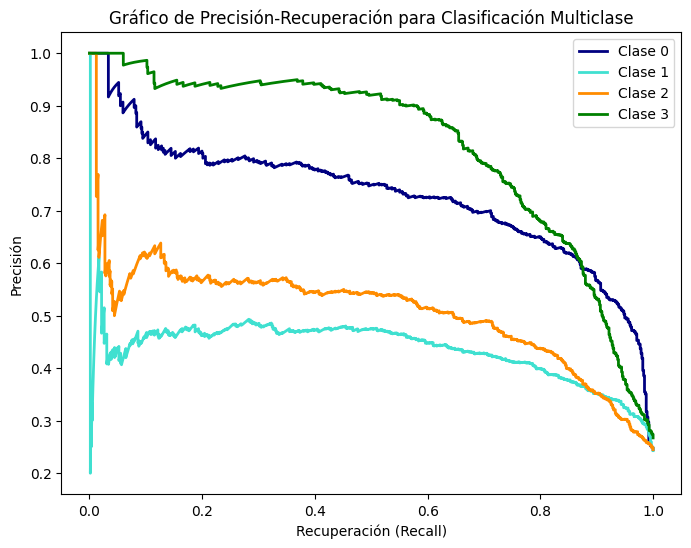

In [64]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_validation) 

# Calcula la precisión y la recuperación para cada clase
precision = dict()
recall = dict()
thresholds = dict()

n_classes = len(np.unique(Y_validation))
for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(Y_validation == i, y_scores[:, i])

# Crea un gráfico de precisión-recuperación para cada clase
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange', 'green']  # Colores para cada clase
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Clase {i}')

plt.xlabel('Recuperación (Recall)')
plt.ylabel('Precisión')
plt.title('Gráfico de Precisión-Recuperación para Clasificación Multiclase')
plt.legend(loc='best')
plt.show()


In [66]:
from sklearn.metrics import classification_report


# Calcula el informe de clasificación
report = classification_report(Y_validation, Y_pred)

# Imprime el informe de clasificación
print(report)


              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70       656
         1.0       0.48      0.44      0.46       651
         2.0       0.52      0.50      0.51       656
         3.0       0.75      0.75      0.75       716

    accuracy                           0.61      2679
   macro avg       0.60      0.61      0.60      2679
weighted avg       0.61      0.61      0.61      2679

